# EE 313 Fall 2020 Extra Credit Assignment
## Modeling COVID-19


Maximum Extra Credit: 10 exam weighted points
Due: Dec. 2, 2020


Prof. Jeffrey Andrews

This assignment is based upon an EE313 Spring 2020 assignment by Prof. Jon Tamir.  It uses existing Python modeling and simulation tools developed at the outset of the 2020 COVID-19 outbreak. For more information, see the following projects:

UT Austin COVID-19 Modeling Consortium white paper:
https://sites.cns.utexas.edu/sites/default/files/cid/files/austin_relaxing_social_distancing.pdf?m=1587681780

Prof. Jeffrey Kantor of University of Notre Dame SEIR model
https://github.com/jckantor/covid-19

PhD Student Paul van Gent's COVID-19 simulator:
https://github.com/paulvangentcom/python_corona_simulation


One common use for EE313 material is to develop modeling and forecasting tools for biophysical phenomena. When approaching these problems, many of the tools we have developed in the class (and together with Probability, EE 351K), can be used for these goals. In these cases, we typically have observations (or data), and wish to fit this data to our model. When approaching these problems, there are in general two approaches to take.

1. Develop a mathematical model that expresses `y[n]` in terms of `x[n]`, and fit the existing data to the model
2. Develop a simulation environment that models interactions and use data to fit the simulation paramters

In both cases, we can extrapolate about future behavior, as well as estimate "what could have been", had we acted differently in the past.

We will explore both mathematical modeling and simulation, and observe the behavior. We will not fit the model to observed data, or use probability or statistical methods, but instead will use the models to gain intuition about disease spread.

## Part 1: Mathematical Modeling

The simplest and most common model in epidemiology is the Susceptible, Infectious, or Recovered or "SIR" model:

https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

![](https://upload.wikimedia.org/wikipedia/commons/9/93/SIR_Flow_Diagram.svg)


In the SIR model, we have a finite population, $P$. At any time, a member of the population is either **Susceptible** (has not been infected), **Infectious** (currently infected, and can spread the disease to the S group), or **Recovered** (is no longer infected and cannot be re-infected). Quite morbidly, a Recovered individual can represent either a person who survived the infection, or a person who perished from the infection (for this reason it is sometimes referred to as Removed). The simple model does not distinguish between the two since in both cases, that individual will no longer spread the disease.

As the figure shows, an individual in the **S** subpopulation has some transition rate to the **I** subpopulation. An individual in the I subpopulation has some transition rate to the **R** subpopulation. A person in the R subpopulation is assumed to never leave that subgroup.

There are a couple parameters to the model:
- $\beta$ is the rate constant [1/day] indicating how quickly the infectious population grows
- $\gamma$ is the rate constant indicating how quickly an infectious person recovers. The average infection duration is $1/\gamma$

The ratio $R_0 = \frac{\beta}{\gamma}$ is the **basic reproduction rate,** and represents the expected (average) number of new infections due to a single infection. Essentially, the larger $R_0$, the **faster the spread of disease**. Many epidemoilogists will report this single number as a summary of the disease model, which of course cloaks the fact that some individuals will spread a disease to a large number of people, while others will not spread it at all, which depends on a variety of genetic and behavioral factors.  For example, recent studies on COVID indicate that 60% of new infections can be traced to under 10% of infected people.  In any case, we will use this summary model for $R_0$.

We can create a discrete-time SIR model as follows. Let $S[n]$, $I[n]$, and $R[n]$ represent the subpopulations on day $n$. Then

\begin{align*}
S[n] & = S[n-1] -\frac{\beta}{P}S[n-1] I[n-1] \\
I[n] & = I[n-1] + \frac{\beta}{P}S[n-1] I[n-1] - \gamma I[n-1]\\
R[n] &= R[n-1] + \gamma I[n-1]
\end{align*} 

What is this saying?

- The **R** subgroup will increase at a rate proportional to the current number of infected. At every time step, about $\gamma I[n]$ infectious people will recover.
- The **I** subgroup will decrease by this rate, since those individuals are now recovered. In addition, individuals will move from the **S** subgroup to the **I** subgroup at a rate proportial to the infection rate, the number of susceptible people, and the number of infectious people. At every time step, about $\frac{\beta}{P}S[n]I[n]$ susceptible people will become infected.
- The **S** subgroup will decrease by this same rate, since those people have become infected


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%matplotlib inline

In [3]:
def SIR_model(S_init, I_init, R_init, N, beta, gamma):
    """
    SIR Model.
    S_init: initial # of susceptible
    I_init: initial # of infected
    R_init: initial # of recovered
    N: # of time steps
    beta: infection rate
    gamma: recovery rate
    """
    S = np.zeros((N,))
    I = np.zeros((N,))
    R = np.zeros((N,))

    S[0] = S_init
    I[0] = I_init
    R[0] = R_init

    for n in range(1,N):
        S[n] = S[n-1] - beta * S[n-1] * I[n-1] / P
        I[n] = I[n-1] + beta * S[n-1] * I[n-1] / P - gamma * I[n-1]
        R[n] = R[n-1] + gamma * I[n-1]
    return S, I, R

def plot_SIR(S, I, R):
    P = S[0] + I[0] + R[0]
    N = len(S)
    plt.plot(S, linewidth=3, label = 'Susceptible')
    plt.plot(I, linewidth=3, label = 'Infected')
    plt.plot(R, linewidth=3, label = 'Recovered')
    plt.legend(fontsize=16)
    plt.ylabel('# of people', fontsize=16)
    plt.xlabel('days since outbreak', fontsize=16)
    plt.xlim([0, N])
    plt.ylim([0, P])

beta is 0.200


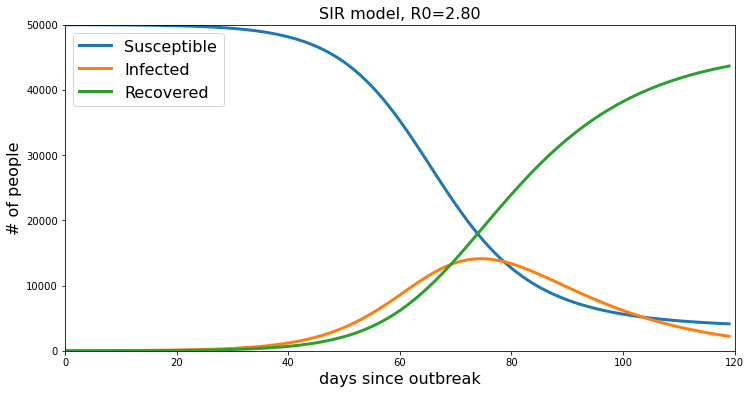

In [4]:
P = 50000 # population
N = 120 # days to simulate
L = 10 # initial infected

R0 = 2.8
gamma = 1 / 14 # recovery rate, approximately 2 weeks of infection
beta = R0 * gamma # infection rate

print('beta is {:.3f}'.format(beta))

S, I, R = SIR_model(P-L, L, 0, N, beta, gamma)

plt.figure(figsize=(12,6))
plot_SIR(S, I, R)
plt.title('SIR model, R0={:.2f}'.format(R0), fontsize=16);

**Task**: Run the SIR model for R0 values of .9, 1.0, 1.5, 2.5, 5 and plot the results. You may want to change the number of days simulated based on the value of R0

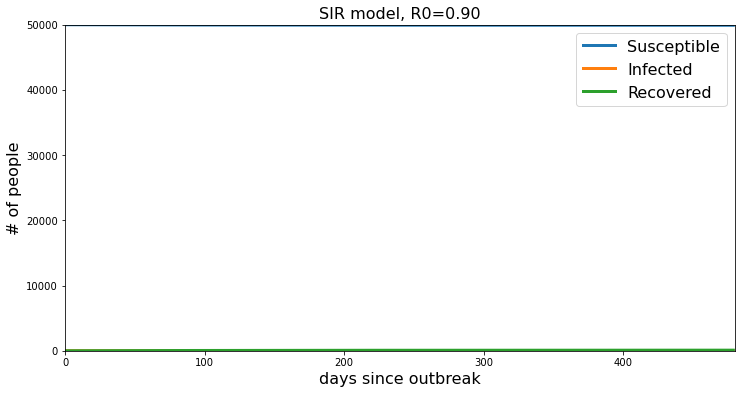

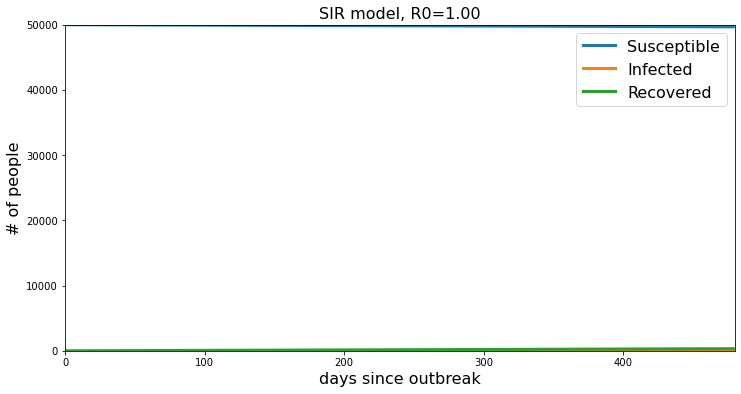

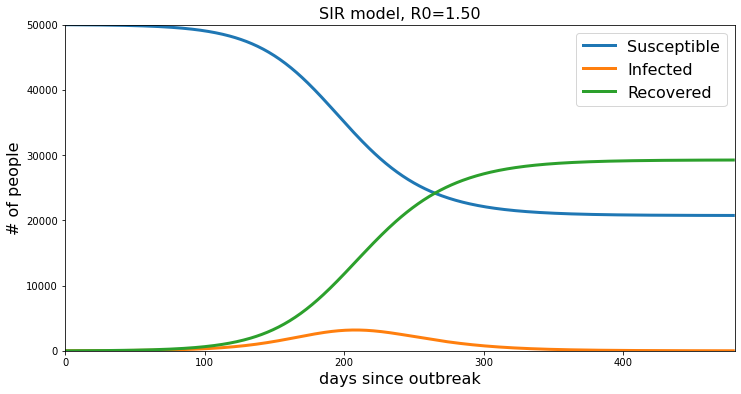

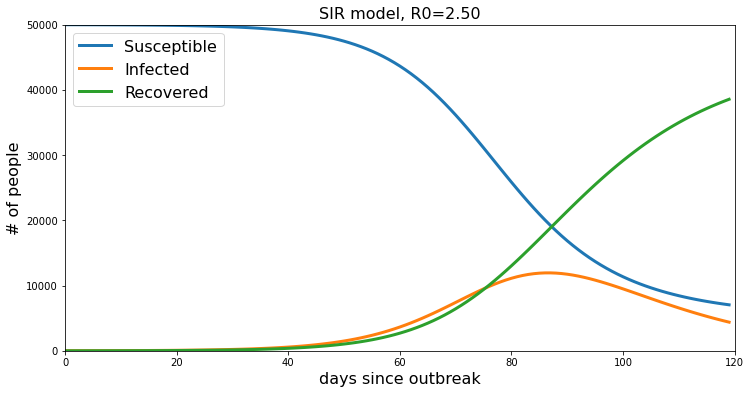

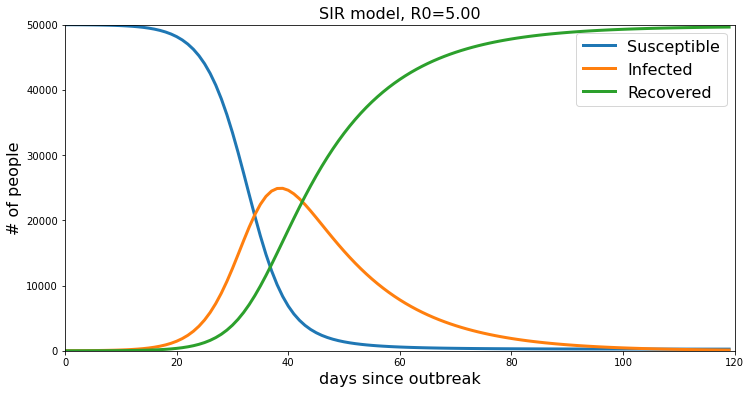

In [5]:
P = 50000 # population
L = 10 # initial infected
N = 480 # days to simulate
R0 = .9
beta = R0 * gamma # infection rate
S, I, R = SIR_model(P-L, L, 0, N, beta, gamma)
plt.figure(figsize=(12,6))
plot_SIR(S, I, R)
plt.title('SIR model, R0={:.2f}'.format(R0), fontsize=16);

P = 50000 # population
L = 10 # initial infected
N = 480 # days to simulate
R0 = 1.0
beta = R0 * gamma # infection rate
S, I, R = SIR_model(P-L, L, 0, N, beta, gamma)
plt.figure(figsize=(12,6))
plot_SIR(S, I, R)
plt.title('SIR model, R0={:.2f}'.format(R0), fontsize=16);

P = 50000 # population
L = 10 # initial infected
N = 480 # days to simulate
R0 = 1.5
beta = R0 * gamma # infection rate
S, I, R = SIR_model(P-L, L, 0, N, beta, gamma)
plt.figure(figsize=(12,6))
plot_SIR(S, I, R)
plt.title('SIR model, R0={:.2f}'.format(R0), fontsize=16);

P = 50000 # population
L = 10 # initial infected
N = 120 # days to simulate
R0 = 2.5
beta = R0 * gamma # infection rate
S, I, R = SIR_model(P-L, L, 0, N, beta, gamma)
plt.figure(figsize=(12,6))
plot_SIR(S, I, R)
plt.title('SIR model, R0={:.2f}'.format(R0), fontsize=16);

P = 50000 # population
L = 10 # initial infected
N = 120 # days to simulate
R0 = 5
beta = R0 * gamma # infection rate
S, I, R = SIR_model(P-L, L, 0, N, beta, gamma)
plt.figure(figsize=(12,6))
plot_SIR(S, I, R)
plt.title('SIR model, R0={:.2f}'.format(R0), fontsize=16);

**Q:** For what values of $R_0$ will no spread occur and why?

<span style="color:blue">**A:** No spread occurs for the values where R0 is less than or equal to 1.0. It means that people are recovering faster than the infectious population is growing

# Travis County statistics
Travis County has an estimated population of 1.3 million. Based on the UT COVID-19 Modeling Consortium report, Travis County has a COVID-19 reproduction rate of approximately $R_0=2.8$, and roughly 3600 hospital beds available for treating COVID-19 patients. 

Run the simulation with the Travis County numbers and plot the result for six months. Assume 10 initial infections. You can use the plotting code below to also plot the number of hospital beds and # of hospitalizations. Assume the hospitalization rate is 2% of all infected individuals. You may want to change the y-axis limits to better visualize the hospitalizations. 


In [6]:
def plot_SIR_icu(S, I, R, H, icu_rate):
    P = S[0] + I[0] + R[0]
    N = len(S)
    plt.plot(S, linewidth=3, label = 'Susceptible')
    plt.plot(I, linewidth=3, label = 'Infected')
    plt.plot(R, linewidth=3, label = 'Recovered')
    plt.plot(range(N), I*icu_rate, linewidth=3, label = 'ICU cases')
    plt.plot(range(N), H*np.ones((N,)), 'k--', linewidth=3, label = 'Hospital Beds')
    plt.legend(fontsize=16)
    plt.ylabel('# of people', fontsize=16)
    plt.xlabel('days since outbreak', fontsize=16)
    plt.xlim([0, N])
    plt.ylim([0, 19200])

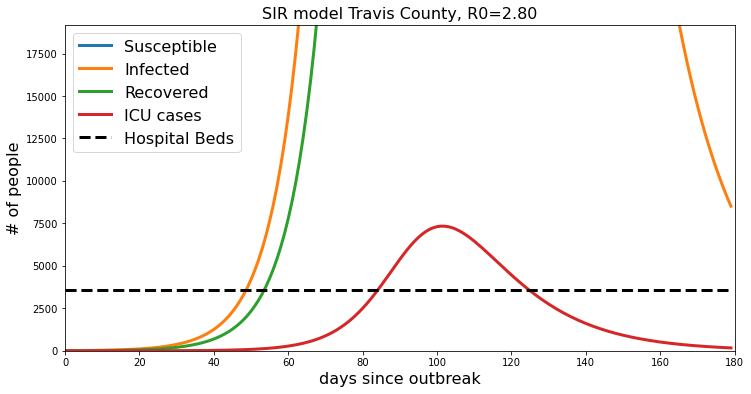

In [7]:
P = 1300000 # population
N = 180 # days to simulate
L = 10 # initial infected
H = 3600
icu_rate = 0.02

R0 = 2.8
gamma = 1 / 14 # recovery rate, approximately 2 weeks of infection
beta = R0 * gamma # infection rate

S, I, R = SIR_model(P-L, L, 0, N, beta, gamma)

plt.figure(figsize=(12,6))
plot_SIR_icu(S, I, R, H, icu_rate)
plt.title('SIR model Travis County, R0={:.2f}'.format(R0), fontsize=16);

**Q:** How many weeks will it take before the hospital system is overwhelmed?

<span style="color:blue">**A:** Around 12 weeks

**TASK**: Write a function that returns the number of days it will take before the hospital system is overwhelmed. This function would take the Infectious group, the Hospital beds, and the hospitalization rate, and return an integer `N` indicating the first day the hospitals are overwhelmed. If the hospitals are never overwhelmed, return -1

In [8]:
def days_before_SHTF(I, H, icu_rate):
    
    """
    Calculates number of days before hopsitals are overwhelmed, i.e. shit hits the fan.
    I: number of infected at day n
    H: number of available hospital beds
    icu_rate: percent of infected that require hospitalization
    return: # days, or -1 if never overwhelmed
    """
    N = len(I)
    for n in range(1,N):
        if H < icu_rate *I[n]:
            return n
    return -1
    # TODO your code here

In [9]:
n = days_before_SHTF(I, H, icu_rate)
print('Days before hospitals are overwhelmed: {}'.format(n))

Days before hospitals are overwhelmed: 85


**Q:** Does your function match with your previous answer?

<span style="color:blue">**A:** Yes, it will take 85 days or a little over 12 weeks.

### Social distancing
We can extend the SIR model to include the effect of social distancing by introducing an "effectiveness" parameter $\mu \in [0, 1]$ that represents a decrease in the infection rate. $\mu=0$ corresponds to no impact, and $\mu=1$ corresponds to full transmission reduction. In this case, the new model is the following:

\begin{align*}
S[n] & = S[n-1] -(1-\mu)\frac{\beta}{P}S[n-1] I[n-1] \\
I[n] & = I[n-1] + (1-\mu)\frac{\beta}{P}S[n-1] I[n-1] - \gamma I[n-1]\\
R[n] &= R[n-1] + \gamma I[n-1]
\end{align*} 

**Task**: Modify the SIR function to include the parameter $\mu$.

In [10]:
def SIR_mu_model(S_init, I_init, R_init, N, beta, gamma, mu=0):
    """
    SIR Model with social distancing.
    S_init: initial # of recovered
    S_init: initial # of susceptible
    I_init: initial # of infected
    N: # of time steps
    beta: infection rate
    gamma: recovery rate
    mu: effectiveness of social distancing
    
    """
    S = np.zeros((N,))
    I = np.zeros((N,))
    R = np.zeros((N,))

    S[0] = S_init
    I[0] = I_init
    R[0] = R_init

    for n in range(1,N):
        S[n] = S[n-1] - ((beta * S[n-1] * I[n-1] / P) * (1 - mu))
        I[n] = I[n-1] + ((beta * S[n-1] * I[n-1] / P) * (1 - mu)) - gamma * I[n-1]
        R[n] = R[n-1] + gamma * I[n-1]
    return S, I, R


Let's assume that social distancing takes effect 2 months after the onset of the disease, and that it is 50% effective. First, run the SIR model without social distancing for 2 months. Then, set $\mu$ to 0.5 and run the model for an additional 4 months. Plot your result as a single plot over six months. Include the hospitalization statistics in the plot. In this scenario, we are assuming that January 1 represents the start of infections, and that March-June we maintain social distancing with an "effectiveness" of 50%.

Tip 1: After running the model once with one set of parameters, you can run the model a second time using the last values of the first run as the new initial conditions

Tip 2: If you run the simulator twice, you can concatenate the results using `np.concatenate((array_1, array_2))`.

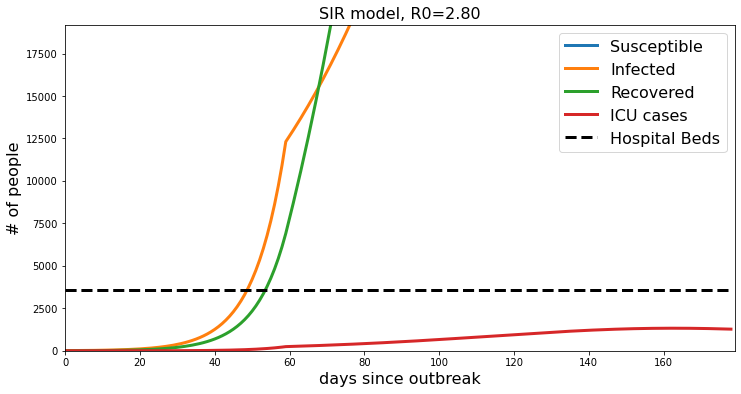

In [11]:
P = 1300000 # population
L = 10 # initial infected

N = 60 # days to simulate
mu = 0

R0 = 2.8
gamma = 1 / 14 # recovery rate, approximately 2 weeks of infection
beta = R0 * gamma # infection rate

S1, I1, R1 = SIR_mu_model(P-L, L, 0, N, beta, gamma, mu)
N = 120 # days to simulate
mu = 0.5

S2, I2, R2 = SIR_mu_model(S1[59], I1[59], R1[59], N, beta, gamma, mu)

H = 3600
icu_rate = 0.02

S = np.concatenate((S1[0:59], S2))
I = np.concatenate((I1[0:59], I2))
R = np.concatenate((R1[0:59], R2))

plt.figure(figsize=(12,6))
plot_SIR_icu(S, I, R, H, icu_rate)
plt.title('SIR model, R0={:.2f}'.format(R0), fontsize=16);

In [12]:
n = days_before_SHTF(I, H, icu_rate)
print('Days before hospitals are overwhelmed: {}'.format(n))

Days before hospitals are overwhelmed: -1


**Q**: Explain what you observe. Did we "flatten the curve"?

<span style="color:blue">**A:** Social Distancing sharply decreased the amount of infections/hospital beds required. We did flatten the curve.

### "Re-opening the economy"
Let's now investigate different plans to re-open the economy. We will assume that re-opening begins on May 1 after 2 months of inaction (January, February), followed by 2 months of social distancing (March, April). It is difficult to model the more common phased re-opening with our simple SIR+mu model. Hence, we will assume that the economy reopens to 25% capacity, which translates to a social distancing effectiveness of $0.25 \times \mu$, and we will ignore the slow rollout.

[1] https://www.kvue.com/article/news/health/coronavirus/gov-greg-abbott-economic-plan-timeline/269-a548f51a-1729-48ab-a63a-afeb8b4426ff

**Task:** Simulate the effect of 60 days without social distancing, followed by 60 days with 50% social distancing, followed by 60 days with re-opening the economy. Plot the result for the six months.

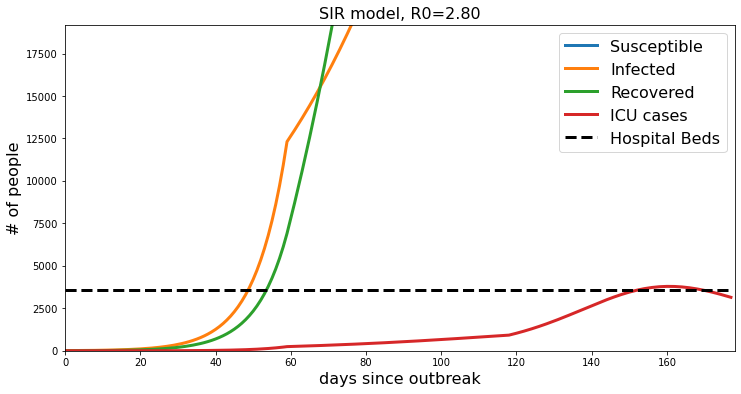

In [13]:
P = 1300000 # population
L = 10 # initial infected

N = 60 # days to simulate
mu = 0

R0 = 2.8
gamma = 1 / 14 # recovery rate, approximately 2 weeks of infection
beta = R0 * gamma # infection rate

S1, I1, R1 = SIR_mu_model(P-L, L, 0, N, beta, gamma, mu)

N = 60 # days to simulate
mu = 0.5

S2, I2, R2 = SIR_mu_model(S1[59], I1[59], R1[59], N, beta, gamma, mu)

N = 60 # days to simulate
mu = 0.25

S3, I3, R3 = SIR_mu_model(S2[59], I2[59], R2[59], N, beta, gamma, mu)

H = 3600
icu_rate = 0.02

S = np.concatenate((S1[0:59], S2[0:59], S3))
I = np.concatenate((I1[0:59], I2[0:59], I3))
R = np.concatenate((R1[0:59], R2[0:59], R3))

plt.figure(figsize=(12,6))
plot_SIR_icu(S, I, R, H, icu_rate)
plt.title('SIR model, R0={:.2f}'.format(R0), fontsize=16);

In [14]:
n = days_before_SHTF(I, H, icu_rate)
print('Days before hospitals are overwhelmed: {}'.format(n))

Days before hospitals are overwhelmed: 153


**Q**: Explain what you observe

<span style="color:blue">**A:** As we reopen, COVID cases start to increase more rapidly. We overwhelm the hospitals in 153 days.

Suppose that we instead continue the social distancing order through May 30. Rerun the simulation to account for an additional 30 days of social distancing.

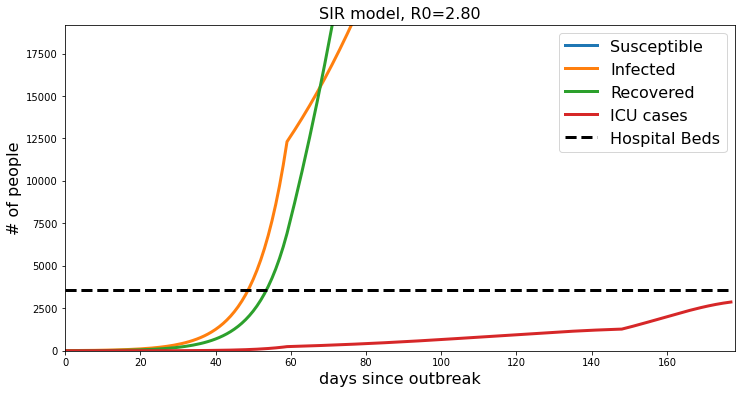

In [15]:
P = 1300000 # population
L = 10 # initial infected

N = 60 # days to simulate
mu = 0

R0 = 2.8
gamma = 1 / 14 # recovery rate, approximately 2 weeks of infection
beta = R0 * gamma # infection rate

S1, I1, R1 = SIR_mu_model(P-L, L, 0, N, beta, gamma, mu)

N = 90 # days to simulate
mu = 0.5

S2, I2, R2 = SIR_mu_model(S1[59], I1[59], R1[59], N, beta, gamma, mu)

N = 30 # days to simulate
mu = 0.25

S3, I3, R3 = SIR_mu_model(S2[89], I2[89], R2[89], N, beta, gamma, mu)

H = 3600
icu_rate = 0.02

S = np.concatenate((S1[0:59], S2[0:89], S3))
I = np.concatenate((I1[0:59], I2[0:89], I3))
R = np.concatenate((R1[0:59], R2[0:89], R3))

plt.figure(figsize=(12,6))
plot_SIR_icu(S, I, R, H, icu_rate)
plt.title('SIR model, R0={:.2f}'.format(R0), fontsize=16);

In [16]:
n = days_before_SHTF(I, H, icu_rate)
print('Days before hospitals are overwhelmed: {}'.format(n))

Days before hospitals are overwhelmed: -1


**Q**: Explain what you observe

<span style="color:blue">**A:** Social Distancing sharply decreased the amount of infections/hospital beds required. We did flatten the curve.

### Re-opening the University
According to the campus introduction risk report by UT Austin COVID-19 Modelling Consortium avaialble [here](https://sites.cns.utexas.edu/sites/default/files/cid/files/ut_reopening.pdf?m=1598027935), about $22,000$ student were expected to return from all around the globe for Fall 2020. The expected COVID-19 prevelance among the returning student was $0.5\%$, which means $0.5\%$ of the returning student were expected to be infected at the beginning to the Fall semester.

Run the simulation with these numbers for two scenarios. 1) When the University re-opens without any safety measures i.e. $\mu=0$ and 2) When the re-opening is done at $25\%$ capacity with proper social distancing protocols in place i.e. $\mu = 0.25\times0.5$. Plot the result for six months. Convert the initial infections to an integer using a floor operation. You can use the plot_SIR() function for plotting the results.

In [17]:
### Here is how to convert a float to an integer
float_num = 4.673
int_num = np.floor(float_num).astype(int)
print(float_num, int_num)

4.673 4


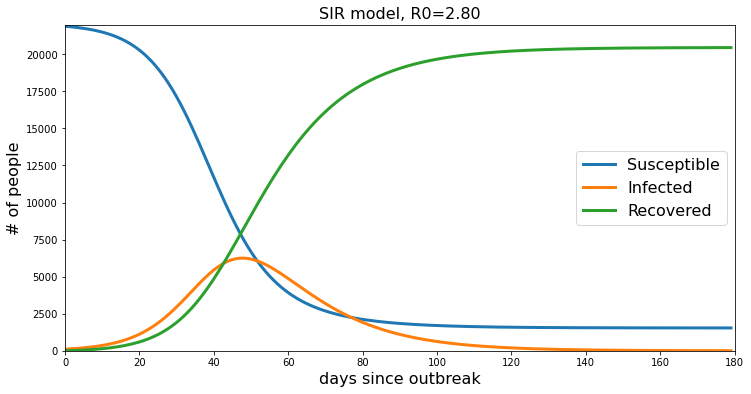

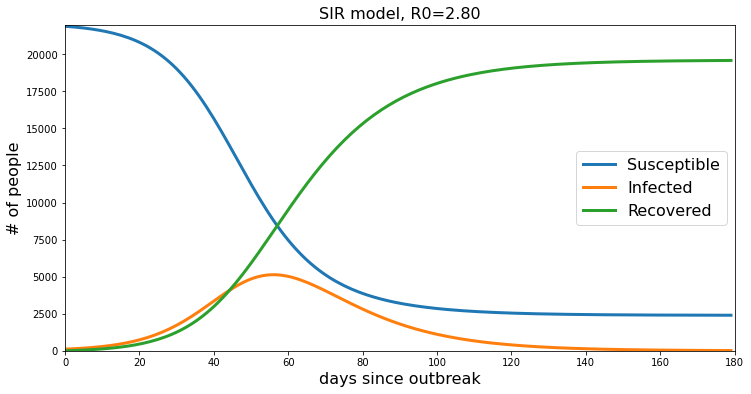

In [18]:
P = 22000 # population
L = np.floor(0.005*P).astype(int) # initial infected

N = 180 # days to simulate
mu = 0

R0 = 2.8
gamma = 1 / 14 # recovery rate, approximately 2 weeks of infection
beta = R0 * gamma # infection rate

S, I, R = SIR_mu_model(P-L, L, 0, N, beta, gamma, mu)

plt.figure(figsize=(12,6))
plot_SIR(S, I, R)
plt.title('SIR model, R0={:.2f}'.format(R0), fontsize=16);

mu = 0.125
S, I, R = SIR_mu_model(P-L, L, 0, N, beta, gamma, mu)

plt.figure(figsize=(12,6))
plot_SIR(S, I, R)
plt.title('SIR model, R0={:.2f}'.format(R0), fontsize=16);

**Q:** What do you observe? How effective is the social distancing here?

<span style="color:blue">**A:** It shows a fairly large number in the peak infected - around 500-1000 cases. I believe that it is fairly effective as even 500 people is a lot of people.

#### Study pods
One of the suggested ways to re-open schools and universities is to isolate students into smaller groups or "pods" where students will mainly come in contact only with the other "peas" in their pod. While the number of infected people in the beginning of the semester stays the same, the risk of exposure within those pods would be much lower.

We can extend the SIR+mu model to analyze the spread of the virus under the "study pods" re-opening strategy. Assume that the population is divided into $K$ pods, each of size $P/K$. While, a robust analysis would require modelling student interactions outside the study pods, for this assignment we will assume that students don't physically interact outside the pod. In this case, dynamics within each pod $k$ will follow the SIR+mu model.
\begin{align*}
S_k[n] & = S_k[n-1] -(1-\mu)\frac{\beta}{P}S_k[n-1] I_k[n-1] \\
I_k[n] & = I_k[n-1] + (1-\mu)\frac{\beta}{P}S_k[n-1] I_k[n-1] - \gamma I_k[n-1]\\
R_k[n] &= R_k[n-1] + \gamma I_k[n-1]
\end{align*}

The total number of susceptible, infected and recovered people in the total population are then given by
\begin{align*}
S[n] &= \sum_{k=1}^KS_k[n]\\
I[n] &= \sum_{k=1}^KI_k[n]\\
R[n] &= \sum_{k=1}^KR_k[n]
\end{align*} 

**Task**: Run the study pods SIR+mu model for $K = 1, 2$ and $3$ and plot the results for 180 days. You can use the Pod_construction() function given below to get the initial S,I and R values for each of the $K$ pods. Assume that $\mu = 0$ within each pod.

In [19]:
def Pod_construction(S_init, I_init, R_init, K):
    """
    Construct K pods given the initial (S,I,R) in the population.
    Return a list of length K, with each of the K elements being a tuple
    of the (S_k, I_k, R_k)
    
    HOW TO USE:
    SIR_pod_list = Pod_construction(S_init, I_init, R_init, K)
    
    for k in range(len(SIR_pod_list)):
        S,I,R = SIR_pod_list[k]
        
        print(S, I, R)
    
    
    R_init: initial # of recovered
    S_init: initial # of susceptible
    I_init: initial # of infected
    K: number of pods required
    """
    
    P = S_init + I_init + R_init # Total population size
    A = np.arange(P)
    I_R = np.random.choice(A, size = I_init+R_init, replace = False)
    
    ## Get a randomized distribution of infected and recovered people
    ## in the pods.
    I = np.random.choice(I_R, size = I_init, replace = False)
    R = I_R[np.logical_not(np.isin(I, I_R))]
    
    ## An array of length P. 
    ## P[i] = 0 represents a susceptible person.
    ## P[i] = 1 represents an infected person.
    ## P[i] = 0 represents a recovered person.
    
    pop_array = np.zeros_like(A)
    pop_array[I] = 1
    pop_array[R] = 2
    
    
    pod_size = np.floor(P/K).astype(int)
    SIR_pod_list = []
    
    ## Get the S, I and R numbers for each pod and append the tuple into 
    ## SIR_pod_list
    for k in range(K):
        pop_sub_array = pop_array[k*pod_size:(k+1)*pod_size]
        S = np.sum(pop_sub_array == 0)
        I = np.sum(pop_sub_array == 1)
        R = np.sum(pop_sub_array == 2)
        SIR_pod_list.append((S,I,R))
        
    return SIR_pod_list

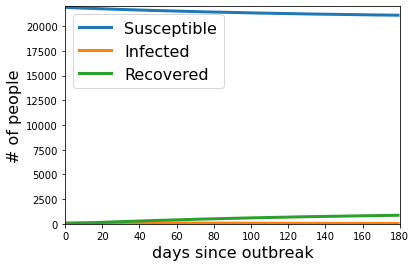

In [26]:
## TODO your code here

# Initialization
mu = 0 # mu 
D = 180 # D 
P = 22000 # P 
L = np.floor(0.005*P).astype(int) # L
K = 3 # K 

R0 = 2.8
gamma = 1 / 14 # recovery rate, approximately 2 weeks of infection
beta = R0 * gamma # infection rate

## Use the Pod_construction() to get the S, I, R numbers to each pod
SIR = Pod_construction(P-L, L, 0, K)
    
## initialize the numpy arrays to store S,I and R for the total population
S = np.zeros(D)
I = np.zeros(D)
R = np.zeros(D)

## Use a for loop to run the simulation for each pod
for k in range(K):
    S_i,I_i,R_i = SIR[k]
    ## get S_k, I_k, R_k using the SIR_mu_model() and the output of 
    S_k, I_k, R_k = SIR_mu_model(S_i, I_i, R_i,  D, beta, gamma, mu)
    ## Pod_construction()
    S = S + S_k
    I = I + I_k
    R = R + R_k
             

## Plot the results
plot_SIR(S, I, R)

**Q:** What do you observe? How does the study pods strategy compare to social distancing?

<span style="color:blue">**A:** It seems to work really well (much better than social distancing). The number of infections is always below 2500.

### Model sensitivity
All predictions are only as good as their modeling assumptions. You may have noticed that our measures just barely avoided overwhelming the hospital. But what happens if we change a parameter by a small amount? For instance, if we change the starting number of infections, or the social distancing effectiveness, or the infection rate? Model sensitivity tells us how much our model will change when a parameter changes slightly, and indicates how susceptible it is to inaccuracies in data, etc. In other words, any time you see a model, you should take it with a grain of salt!


### Improving the model
Of course, the SIR model we explored is highly simplistic. Among its limitations are the following:
- does not account for incubation period
- does not model severity of infection across population subgroups
- does not model the difference between recovered and removed
- does not consider possible reinfection

Instead of developing a mathematical model and running the difference equations, we could instead build a simulation environment and observe the different policy effects. Our simulation will need to make assumptions of how poeple behave. For instance, it is common to model people as "random walks" (similar to gas particles), i.e. we assume that people move around the world randomly, and when they collide with an infected person, they have a chance of spreading the infection and moving in a new direction. 

Recently, The Washington Post has an excellent interactive article explaining these ideas with simple simulators.

https://www.washingtonpost.com/graphics/2020/world/corona-simulator/

Based off of this idea, Paul van Gent's created a similar simulator in Python. We recommend downloading the code and trying it out:

https://github.com/paulvangentcom/python_corona_simulation